---
# <div align="center"><font color='blue'>  </font></div>
# <div align="center"><font color='blue'> COSC 2779 | Deep Learning  </font></div>
## <div align="center"> <font color='blue'> Week 3 Lecture: **Neural Network Optimization**</font></div>
---

This script provides examples that show the inportance of selecting the correct:
- Activation
- Learning Rate
- Optimizer in your project. 

However, the results should not be used to make conclusuins about the elements involved. The most suitable element will depend n the problem you are solving.

# Setup

In [1]:
import tensorflow as tf
import datetime, os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Downloaf MNIST data

In [2]:
# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
MAX_EPOCH = 25

A function to display performance curves

In [4]:
from itertools import cycle
def plotter(history_hold, metric = 'accuracy', loss='loss', ylim_metric=[0.0, 1.0], ylim_loss=[0.0,1.0]):
  cycol = cycle('bgrcmk')
  plt.figure(figsize=(10,5))
  for name, item in history_hold.items():
    metric_train = item.history[metric]
    metric_val = item.history['val_' + metric]
    loss_train = item.history[loss]
    loss_val = item.history['val_' + loss]

    x_train = np.arange(0,len(loss_val))

    c=next(cycol)

    plt.subplot(1,2,1)
    plt.plot(x_train, metric_train, c+'-', label=name+'_train')
    plt.plot(x_train, metric_val, c+'--', label=name+'_val')

    plt.legend()
    plt.xlim([1, max(plt.xlim())])
    plt.ylim(ylim_metric)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.grid(True)
    plt.title(metric)


    plt.subplot(1,2,2)
    plt.plot(x_train, loss_train, c+'-', label=name+'_train')
    plt.plot(x_train, loss_val, c+'--', label=name+'_val')

    plt.legend()
    plt.xlim([1, max(plt.xlim())])
    # plt.ylim(ylim_loss)
    plt.xlabel('Epoch')
    plt.ylabel(loss)
    plt.grid(True)
    plt.title(loss)

A function to fit a compile and fit a model

In [5]:
def compile_and_fit(model, name, optimizer=None, max_epochs=50):
  if optimizer is None:
    optimizer = tf.keras.optimizers.SGD()
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # model.summary()
  
  history = model.fit(x=x_train, 
              y=y_train, 
              epochs=max_epochs, 
              verbose=0,
              validation_data=(x_test, y_test))
  
  return history

# Activation

Lets try three different activation functions we learned in Week 2 and see how the performance vary.

In [6]:
m_histories = {}

ReLU as hidden activation

In [7]:
# Create model
model_relu = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['model_relu'] = compile_and_fit(model_relu, 'models/model_relu',max_epochs=MAX_EPOCH)

Sigmoid as hidden activation

In [8]:
# Create model
model_sig = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['model_sig'] = compile_and_fit(model_sig, 'models/model_sig',max_epochs=MAX_EPOCH)


Elu as hidden activation

In [9]:
# Create model
model_elu = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['model_elu'] = compile_and_fit(model_elu, 'models/model_elu',max_epochs=MAX_EPOCH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

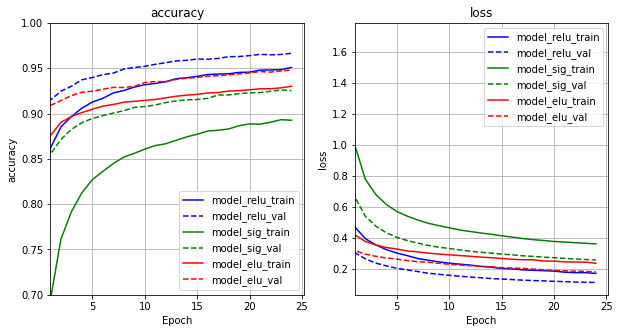

In [10]:
plotter(m_histories, metric = 'accuracy', ylim_metric=[0.7, 1.0], ylim_loss=[0.0, 1.0])

# Learning Rate

Lets now change the learning rate

In [11]:
m_histories = {}

LR for SGD = 0.01

In [12]:
# Create model
model_LR_0p01 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['LR_0p01'] = compile_and_fit(model_LR_0p01, 'models/model_LR_0p01',
                                         max_epochs=MAX_EPOCH, 
                                         optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

LR for SGD = 15

In [13]:
# Create model
model_LR_10p0 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['LR_10p0'] = compile_and_fit(model_LR_10p0, 'models/model_LR_10p0',
                                        max_epochs=MAX_EPOCH, 
                                        optimizer=tf.keras.optimizers.SGD(learning_rate=15.0))

LR for SGD = 0.0001

In [14]:
# Create model
model_LR_0e6 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['LR_0e4'] = compile_and_fit(model_LR_10p0, 'models/model_LR_0e4',
                                        max_epochs=MAX_EPOCH, 
                                        optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

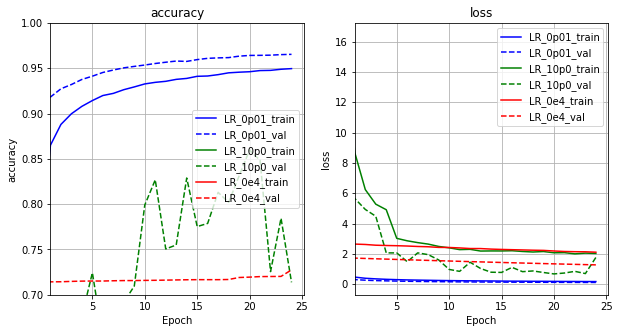

In [15]:
plotter(m_histories, metric = 'accuracy', ylim_metric=[0.7, 1.0], ylim_loss=[0.0, 1.0])

# Optimizers

Lets change the optimizer

In [16]:
m_histories = {}

### SGD

In [17]:
# Create model
model_SGD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['SGD'] = compile_and_fit(model_SGD, 'models/model_SGD',
                                         max_epochs=MAX_EPOCH, 
                                         optimizer=tf.keras.optimizers.SGD())

### Adam

In [18]:
# Create model
model_Adam = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['Adam'] = compile_and_fit(model_SGD, 'models/model_Adam',
                                         max_epochs=MAX_EPOCH, 
                                         optimizer=tf.keras.optimizers.Adam())

### RMSprop

In [19]:
# Create model
model_RMSprop = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

m_histories['RMSprop'] = compile_and_fit(model_RMSprop, 'models/model_RMSprop',
                                         max_epochs=MAX_EPOCH, 
                                         optimizer=tf.keras.optimizers.RMSprop())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

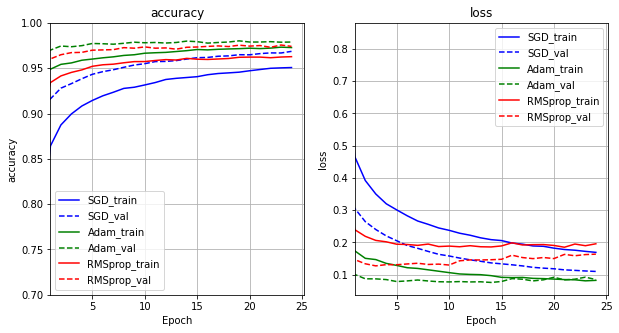

In [20]:
plotter(m_histories, metric = 'accuracy', ylim_metric=[0.7, 1.0], ylim_loss=[0.0, 1.0])